## 지그재그의 데이터분석

## *set options

In [1]:
import pandas as pd

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

**1. data 폴더의 zigzag_DB.db에 연결한 뒤 데이터베이스 스키마를 출력하고  order 테이블을 불러오겠습니다.**

In [3]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import합니다.
import pandas as pd
import sqlite3

In [4]:
connect = sqlite3.connect('zigzag_DB.db')

connect

**2. order 테이블을 이용해 지그재그의 당일 매출 상위 10개 쇼핑몰을 구하겠습니다.**

In [5]:
query = "select * from 'order'"
order = pd.read_sql(query, connect)

print(order.shape)
order.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [6]:
price_table = pd.pivot_table(data = order, index = 'shop_id', values = 'price', aggfunc = 'sum')

# 상위 10개를 출력하겠습니다.
price_table = price_table.sort_values(by = 'price', ascending = False)

price_table.head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


**3. 판매 건수를 포함하여 피벗테이블을 만들고 상위 10개 쇼핑몰의 매출을 막대그래프로 출력하겠습니다.**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
price_table = pd.pivot_table(data = order, index = 'shop_id', values = 'price', aggfunc = ['sum', 'count'])

price_table.columns = ['sum', 'count']

price_table = price_table.sort_values(by = 'sum', ascending = False).head(10)

price_table

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


Text(0.5, 1.0, '상위 10개 쇼핑몰별 매출')

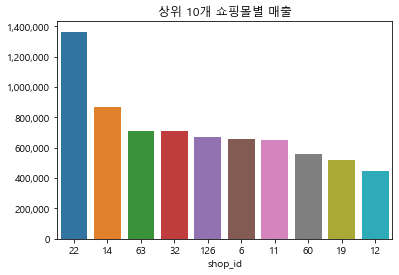

In [9]:
# shop_id 가 인덱스여서 오류가 나는데 이럴 경우에는 reset_index()를 활용하여 새로운 인덱스를 지정하는 방법과
# price_table.index 를 x에 입력하면 된다.

import matplotlib
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter

# sns.barplot(data = price_table, x = price_table.index, y = 'sum', order = price_table.index)

matplotlib.rc('font', family = 'Malgun Gothic')

price_table = price_table.reset_index()
ax = sns.barplot(data = price_table, x = 'shop_id', y = 'sum', order = price_table['shop_id'])
ax.set_ylabel('')

# y축 값이 1e6 형식으로 출력되어 위의 그래프 형식(백만단위)로 변환시키겠습니다.
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title('상위 10개 쇼핑몰별 매출')  # 그래프 제목

**4. 시간대별 지그재그 매출을 구하려고 합니다. lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화하겠습니다.**

In [10]:
import matplotlib as mpl

sns.set_style(None) # 스타일 설정

mpl.rc('font', family='Malgun Gothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Text(0.5, 1.0, 'timestamp별 매출')

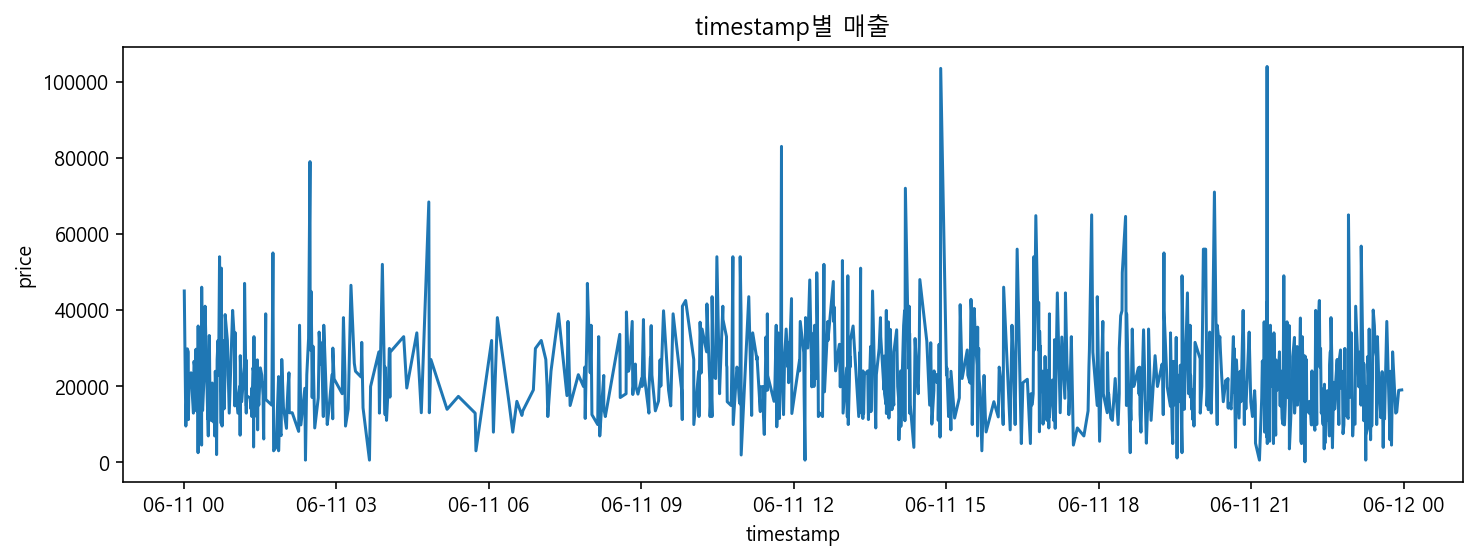

In [11]:
import matplotlib.pyplot as plt

# 먼저 timestamp 컬럼을 datetime 형태로 변환하겠습니다.
order['timestamp'] = pd.to_datetime(order['timestamp'])

# 그래프 크기 설정 후, lineplot을 그리겠습니다.
plt.figure(figsize = (12, 4))
ax = sns.lineplot(data = order, x = 'timestamp', y = 'price')

ax.set_title('timestamp별 매출')  # 그래프 제목

**5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만들겠습니다.**

In [12]:
# timestamp 컬럼에서 시간 정보를 추출하여 hour 컬럼을 만들겠습니다.
order['hour'] = order['timestamp'].dt.hour

# 피벗테이블을 활용하여 시간별 price 출력하겠습니다.
hour_price_table = pd.pivot_table(data = order, index = 'hour', values = 'price', aggfunc = 'sum')

hour_price_table

,price
hour,
0,1479210
1,990300
2,787830
3,467650
4,304800
5,47100
6,192400
7,430300
8,437060


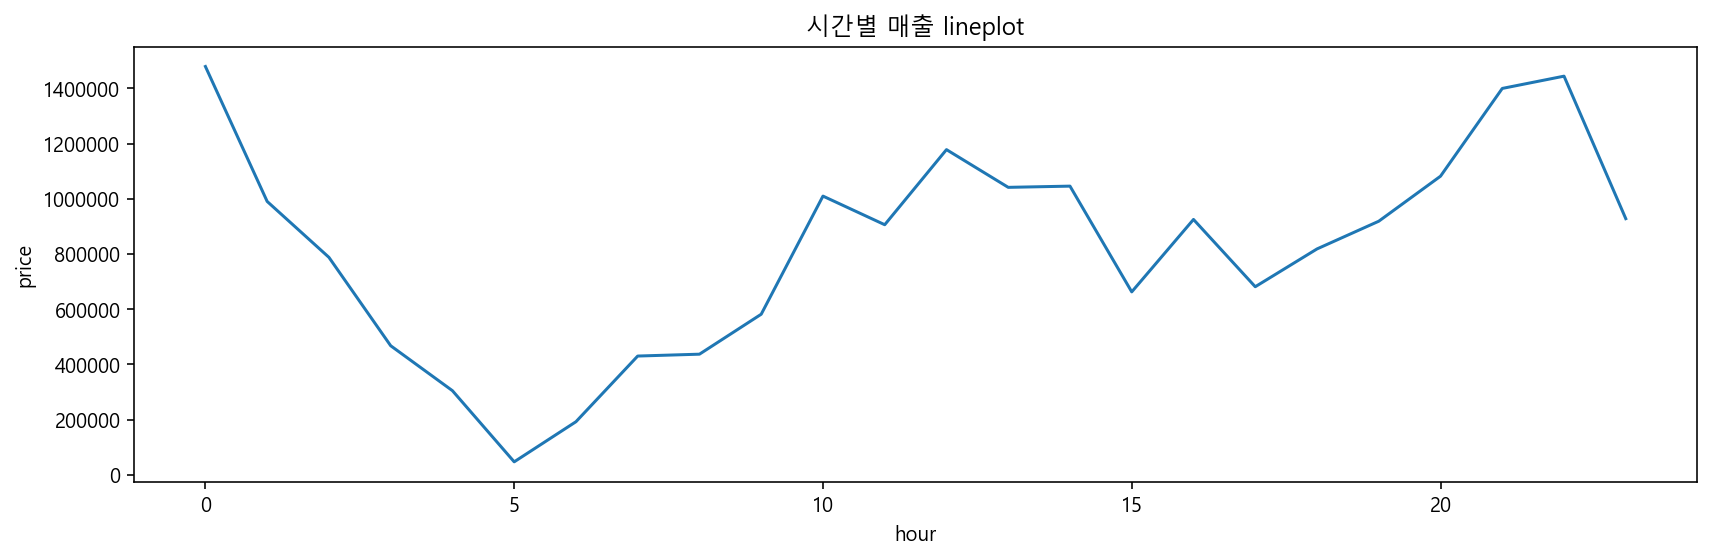

In [13]:
# lineplot을 이용하여 시간별 price를 출력하겠습니다.

plt.figure(figsize = (14, 4))
ax = sns.lineplot(data = hour_price_table, x = hour_price_table.index , y = 'price', ci = None)

ax.set_title('시간별 매출 lineplot')# 그래프 제목

# y축이 1e6 단위로 출력되어 ticklabel_format 함수 및 style = 'plain' 옵션을 사용하여 백만 단위로 변환하겠습니다.
ax.ticklabel_format(style = 'plain')

Text(0.5, 1.0, '시간별 매출 pointplot')

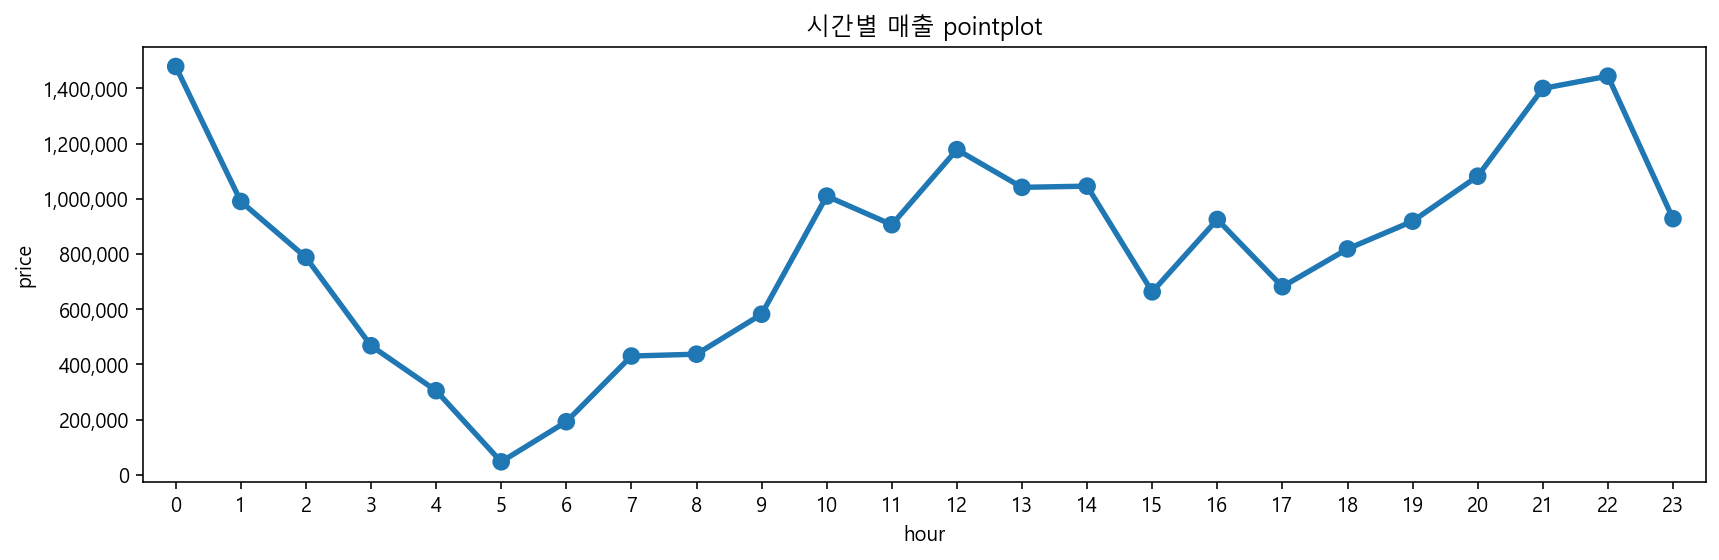

In [14]:
# pointplot을 이용하여 시간별 price를 출력하겠습니다.

plt.figure(figsize = (14, 4))
ax = sns.pointplot(data = hour_price_table, x = hour_price_table.index , y = 'price')

# y축 값이 1e6 형식으로 출력되어 위의 그래프 형식(백만단위)로 변환시키겠습니다.
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title('시간별 매출 pointplot')# 그래프 제목

**6 . user 테이블을 불러와 order 테이블과 병합하겠습니다.**

In [15]:
# 먼저 user 테이블을 불러왔습니다.
query = "select * from 'user'"
user = pd.read_sql(query, connect)

print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [16]:
# order 테이블과 user 테이블을 user_id 컬럼을 키로 해서 합치겠습니다.

order_user = pd.merge(order, user, on = 'user_id')

print(order_user.shape)
order_user.head()

(867, 8)


,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


**7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하겠습니다.**

In [17]:
# 나이가 -1 인 경우를 제외하여 without_minus_age 변수에 저장하겠습니다.
without_minus_age = order_user[order_user['age'] != -1]

# age 는 평균, price 는 sum 으로 하는 피벗테이블을 만들겠습니다.
without_minus_age_table = pd.pivot_table(data = without_minus_age, index = 'shop_id', values = ['price', 'age'], aggfunc = {'age':'mean',
                                                                                                                 'price':'sum'})
# price 컬럼을 기준으로 매출이 높은 순으로 10개를 변수에 저장하겠습니다.
top_10_table = without_minus_age_table.sort_values(by = 'price', ascending = False).head(10)

# price 컬럼의 인덱스를 변수에 저장하겠습니다.
top_10_index = top_10_table['price'].index

top_10_index

Int64Index([22, 14, 32, 126, 63, 6, 11, 60, 19, 12], dtype='int64', name='shop_id')

In [18]:
# isin 함수 활용하는 방법

without_minus_age = without_minus_age.loc[without_minus_age['shop_id'].isin(top_10_index)]

print(without_minus_age.shape)
without_minus_age.head()


# loc 를 활용하는 방법

# without_minus_age = without_minus_age[(without_minus_age['shop_id'] == 22) |
#                   (without_minus_age['shop_id'] == 14) |
#                   (without_minus_age['shop_id'] == 32) |
#                   (without_minus_age['shop_id'] == 126) |
#                   (without_minus_age['shop_id'] == 63) |
#                   (without_minus_age['shop_id'] == 6) |
#                   (without_minus_age['shop_id'] == 11) |
#                   (without_minus_age['shop_id'] == 60) |
#                   (without_minus_age['shop_id'] == 19) |
#                   (without_minus_age['shop_id'] == 12)]

# print(without_minus_age.shape)
# without_minus_age.head()

(347, 8)


,timestamp,user_id,goods_id,shop_id,price,hour,os,age
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
5,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,55,22,11200,0,iOS,21
6,2018-06-11 00:06:14.314,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,2451,22,19800,0,iOS,22
7,2018-06-11 00:08:39.716,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,4278,60,23500,0,iOS,24
9,2018-06-11 00:11:30.954,Evz6xmsye1BP7i33rr_RAjwBRZ_AOsTZ,686,22,12900,0,And,27


Text(0.5, 1.0, '매출 Top 10 쇼핑몰별 구매자들의 연령대 boxplot')

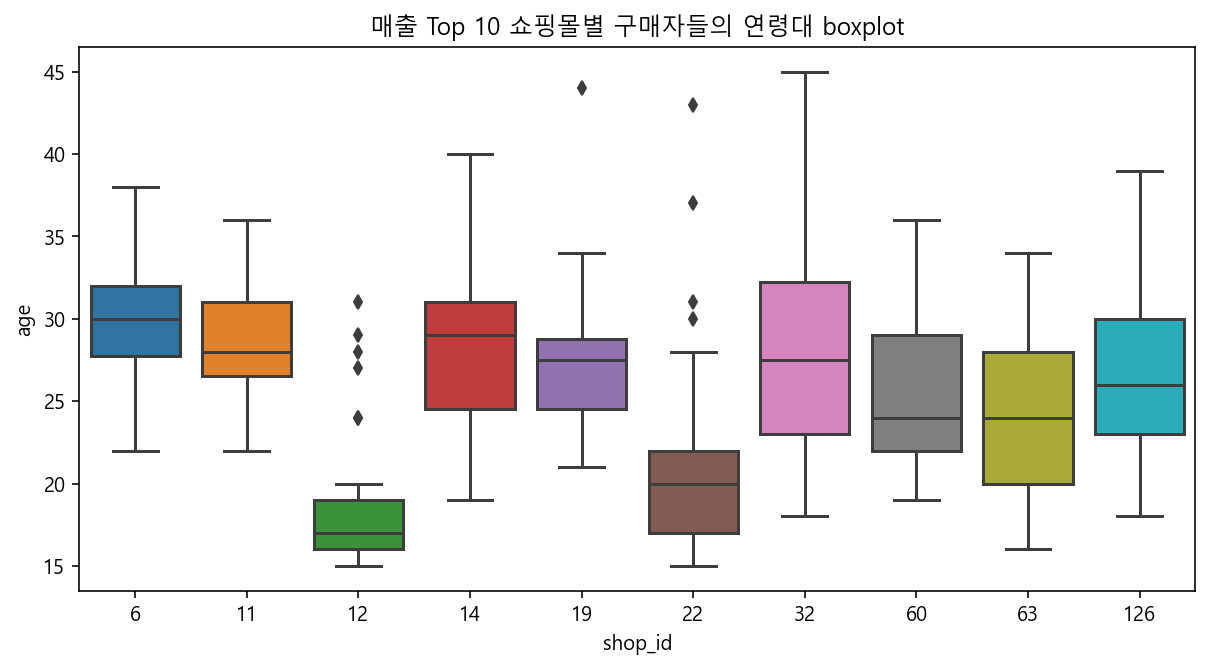

In [19]:
# boxplot으로 시각화하겠습니다.

plt.figure(figsize = (10, 5))
ax = sns.boxplot(data = without_minus_age, x = 'shop_id', y = 'age')

ax.set_title('매출 Top 10 쇼핑몰별 구매자들의 연령대 boxplot')

Text(0.5, 1.0, '매출 Top 10 쇼핑몰별 구매자들의 연령대 violinplot')

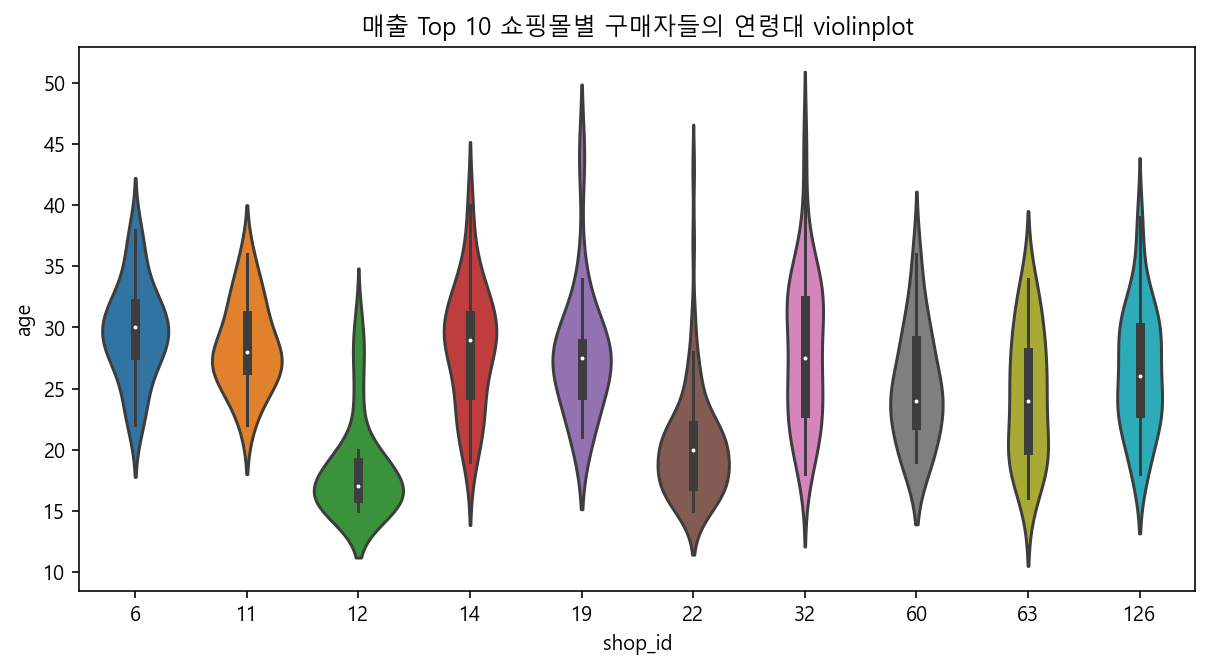

In [20]:
# violinplot으로 시각화하겠습니다.

plt.figure(figsize = (10, 5))
ax = sns.violinplot(data = without_minus_age, x ='shop_id', y = 'age')

ax.set_title('매출 Top 10 쇼핑몰별 구매자들의 연령대 violinplot')  # 그래프 제목

**8. user 테이블에 연령대를 나타내는 칼럼을 만들고 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증하겠습니다.**

아래의 함수를 이용해 user 테이블에 연령대를 만들겠습니다.

In [21]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [22]:
# user 테이블에 위의 함수를 적용시켜 '연령대' 컬럼을 추가하겠습니다.

user['연령대'] = user['age'].apply(make_generation)

user.head()

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반


In [23]:
# shop 테이블을 불러와 shop 이라는 변수에 저장하겠습니다.

query = "select * from 'shop'"
shop = pd.read_sql(query, connect)

print(shop.shape)
shop.head()

(200, 5)


,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [24]:
# 기존의 order 와 연령대 컬럼을 추가한 user 테이블을 shop_id 기준으로 먼저 병합하겠습니다.

order_user = pd.merge(order, user, on = 'user_id')

print(order_user.shape)
order_user.head()

(867, 9)


,timestamp,user_id,goods_id,shop_id,price,hour,os,age,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1,미입력
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34,30대 중반
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17,10대


In [25]:
# 위에서 합친 order_user 와 shop을 shop_id 컬럼을 기준으로 합치겠습니다.

order_user_shop = pd.merge(order_user, shop, on = 'shop_id')

print(order_user_shop.shape)
order_user_shop.head()

(867, 13)


,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


In [26]:
# '거래연령 일치여부' 컬럼을 만들기 위한 함수를 만들겠습니다.

def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [27]:
# 위의 함수를 적용시켜 '거래연령 일치여부' 컬럼을 만들겠습니다.

order_user_shop['거래연령 일치여부'] = order_user_shop.apply(check_generation, axis = 1)

print(order_user_shop.shape)
order_user_shop.head()

(867, 14)


,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직,True


In [28]:
# 'shop_id' 와 '거래연령 일치여부' 컬럼을 활용하여 피벗테이블을 만들겠습니다.

age_table = pd.pivot_table(data = order_user_shop, index = 'shop_id', values = '거래연령 일치여부', aggfunc = ['mean', 'count'])

age_table.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


In [29]:
# 위에서 만든 상위 10개 shop_id의 인덱스로 거래연령 일치여부 피벗테이블을 만들겠습니다.

top_10_index = without_minus_age['shop_id'].value_counts().index.tolist()

age_table[age_table.index.isin(top_10_index)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나옵니다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있습니다.

**9. 쇼핑몰의 스타일 태그를 정리하겠습니다.**

In [30]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [31]:
# 먼저 style_list 에 저장된 이름으로 된 컬럼을 만들고 컬럼명과 동일한 값(문자열)으로 채워주겠습니다.
for i in style_list:
    new_column = f'{i}'
    shop[new_column] = new_column

# style 컬럼의 값을 '/' 기준으로 분리하여 style_split 변수에 저장하겠습니다.
style_split = shop['style'].str.split('/')

# 기존의 값과 분리한 값이 동일하면 True, 아니면 False로 대체하겠습니다.
for i in style_list:
    shop[i] = (shop[i] == style_split.str.get(0)) | (shop[i] == style_split.str.get(1))

shop.head()

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드를 찾아 매출이 가장 많은 3가지 스타일의 구매 연령대 분포를 출력하겠습니다.**

In [32]:
merged = (
    order.merge(shop, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
merged.head(3)

(867, 32)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37,30대 후반


Text(0.5, 1.0, '모던시크/심플베이직/러블리 스타일별 구매 연령대 비교')

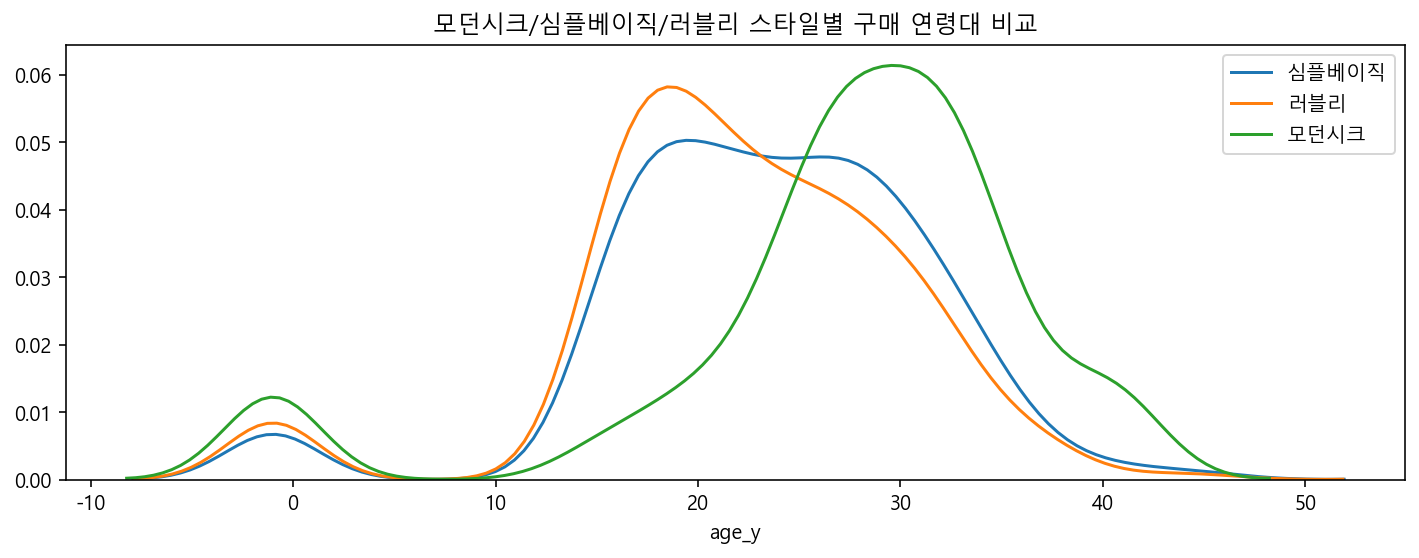

In [33]:
# 폰트 및 그래프 크기 설정
plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = (12,4))

# 모던시크, 심플베이직, 러블리 컬럼을 각각 새로운 변수에 저장하겠습니다.
modern = merged[merged['모던시크']]
simple = merged[merged['심플베이직']]
lovely = merged[merged['러블리']]

# 히스토그램을 제거한 distplot을 출력하겠습니다.
ax = sns.distplot(simple['age_y'], hist = False, label = '심플베이직')
ax = sns.distplot(lovely['age_y'], hist = False, label = '러블리')
ax = sns.distplot(modern['age_y'], hist = False, label = '모던시크')

ax.set_title('모던시크/심플베이직/러블리 스타일별 구매 연령대 비교')  # 그래프 제목

**10. DB에서 로그 데이터를 불러온 다음 timestamp 컬럼을 datetime 형식으로 바꿔주겠습니다. 그리고 user id를 보기 쉽게 간단한 자연수 형태로 변환하겠습니다.**

In [34]:
# DB에서 로그 데이터를 불러오겠습니다.
query = "select * from 'log'"

log = pd.read_sql(query, connect)

print(log.shape)

log.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


In [35]:
# 로그 데이터에서 timestamp 컬럼을 datetime 형태로 바꾸겠습니다.

log['timestamp'] = pd.to_datetime(log['timestamp'])

log.dtypes

timestamp         datetime64[ns]
user_id                   object
event_origin              object
event_name                object
event_goods_id           float64
event_shop_id            float64
dtype: object

지그재그 로그 데이터의 명세는 다음과 같습니다.


    - 컬럼 별 명세
        1. timestamp : 이벤트 발생 시간 (한국 시간 기준)
        2. user_id : 이용자 고유 식별자
        3. event_origin : 이벤트가 발생한 앱 위치
            - event_origin 값 별 의미
                a. goods_search_result : 특정 검색어의 상품 검색 결과
                    (Ex: goods_search_result/반팔티)
                b. shops_ranking : '쇼핑몰 랭킹' 영역
                c. shops_bookmark : '즐겨찾기' 영역
                d. category_search_result : 카테고리 검색 결과 
                    (Ex:category_search_result/상의)
                e. my_goods : '내 상품' 영역
                
        4. event_name : 발생한 이벤트 명
            - event_name 값 별 의미
                a. app_page_view : 앱 내 화면 이동
                b. enter_browser : 앱 내 클릭을 통해, 특정 웹페이지로 진입
                c. add_bookmark : 특정 쇼핑몰을 즐겨찾기 추가
                d. remove_bookmark : 특정 쇼핑몰을 즐겨찾기 제거
                e. add_my_goods : 특정 상품을 내 상품 추가
                f. remove_my_goods : 특정 상품을 내 상품 제거
                
        5. event_goods_id : 이벤트가 발생한 상품 고유 식별자
             - 상품 관련 이벤트가 아닌 경우, 공백
             
        6. event_shop_id : 이벤트가 발생한 쇼핑몰 고유 식별자
             - 쇼핑몰 관련 이벤트가 아닌 경우, 공백



기존의 고객 아이디와 새롭게 만들 고객 아이디를 짝지어 딕셔너리로 만들고 이를 mapping하여 진행을 할 것입니다.

In [36]:
# 판다스의 unique() 기능을 이용하여 유저 아이디를 user_id라는 변수에 저장합니다.

# Write your code here!

# unique() 기능을 사용하기 전에 user_id 컬럼을 기준으로 정렬하겠습니다.
sorted_user_id = log.sort_values(by = 'user_id')

# unique() 기능을 활용한 값을 user_id에 저장하겠습니다.
user_id = sorted_user_id['user_id'].unique()

user_id

array(['--PYPMX8QWg0ioT5zfORmU-S5Lln0lot',
       '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv',
       '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', ...,
       'zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs',
       'zznj-LHhddVvuzZmbZpw6MSylLO64982',
       'zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV'], dtype=object)

In [37]:
#새로운 user_id는 연속된 자연수들로 지정합니다. range()와 len()을 사용하여 user_id의 개수만큼의 연속된 정수를 만듭니다.

# Write your code here!

n_user_id = []
for i in range(len(user_id)):
    n_user_id.append(i)

n_user_id[:5]

[0, 1, 2, 3, 4]

In [38]:
#python 내장 함수인 zip()을 이용하여 기존의 id와 새로운 id를 묶습니다.
id_zip = zip(user_id, n_user_id)

#id_zip을 출력하면 아래 결과와 같이 zip object이 출력됩니다.
print(id_zip)

In [39]:
#zip()의 결과를 구체적으로 보기 위하여 list로 변환하여 print하겠습니다. 상위 5개만 출력합니다.
list(zip(user_id, n_user_id))[:5]

[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0),
 ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1),
 ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2),
 ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3),
 ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]

In [40]:
#새로운 id와 기존의 id가 대응된 딕셔너리 타입 변수를 생성합니다.
id_dict = dict(id_zip)

id_dict

{'--PYPMX8QWg0ioT5zfORmU-S5Lln0lot': 0,
 '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv': 1,
 '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN': 2,
 '-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1': 3,
 '-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k': 4,
 '-3fmY1WsLkYJwN_8lZQMmxZd6zJTAcT1': 5,
 '-3q-oynqxFEgSHUwX802hpmi1louyQNv': 6,
 '-428TMckUlhn6ptxN7gR2FGaSyXjSnaD': 7,
 '-4O8WnD8dT6nWho-4KbIm6TvnK4BmjX_': 8,
 '-4ltLPS55n6J2wSUCLxEZwxYdeW37cK5': 9,
 '-5BA0EwkyhGLCC8FxzvvDgyrZWYJM33I': 10,
 '-5Cwn2Fcx9j16QSM2-SLiaLMm0sS4E2I': 11,
 '-5o3lkvJctT3uURb5JWPVxe1VjqhyzAi': 12,
 '-622WUNWBtjX5VGKx8UnOtn2NVHD_NaB': 13,
 '-62U2A3KHjNZ2XXmOgQTSWEfPg1RRWWy': 14,
 '-63J8veARgGL3ulnRKblm4xhhwkvjKzG': 15,
 '-6UZWGgl3AAI7Df2sVWLX6oT6zP43zo0': 16,
 '-6jxyh56lSivkbLm3WNGRCmdyrdsBmNW': 17,
 '-71z4lG_D-eKnOmDCJlUaNvVcwd808yw': 18,
 '-75tFsDSoUwapUvwCUHTZiGTGkaSDleQ': 19,
 '-7SKUZkBmbG2ZMvJ0E0jmMDcd8PgmARb': 20,
 '-7uBbvfy4gff6mHV9XotjVO2YlCY2r8v': 21,
 '-8htVW7UIA8qRupSdCx-6PzIXLI_vk2p': 22,
 '-9qbSavSdufdw9JwmiWX1_URT2E2QxFZ': 23,
 '-Ae6T8G5uAZldwUEOTMR-KzG

In [41]:
# log, order, user에 id_idct를 mapping하여 각 데이터 프레임에 새로운 고객 id컬럼인 n_user_id를 만듭니다.

# Write your code here! (3 lines)
log['n_user_id'] = log['user_id'].map(id_dict)
order['n_user_id'] = order['user_id'].map(id_dict)
user['n_user_id'] = user['user_id'].map(id_dict)

# 결과를 확인합니다.
log[['user_id', 'n_user_id']].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3287
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,7775
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,7851
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3287
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,5558


 **12. 주문 데이터, 로그 데이터를 concat하겠습니다.**

In [42]:
#주문 데이터의 첫번째 row를 출력합니다.

order.iloc[0]

timestamp          2018-06-11 00:00:43.032000
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
hour                                        0
n_user_id                                6185
Name: 0, dtype: object

In [43]:
user_id_0 = order.iloc[0]
print(user_id_0)

# user_id를 찾아야 하므로 user_id_0[1]을 해주니 위와 같은 해당 고객의 log 기록이 출력되었습니다.
log[log['user_id'] == user_id_0[1]]

timestamp          2018-06-11 00:00:43.032000
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
hour                                        0
n_user_id                                6185
Name: 0, dtype: object


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6185
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6185
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,6185
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6185
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6185
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6185
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6185


In [44]:
# 이제 주문데이터(order)와 로그데이터(log)를 concat 함수를 사용하여 합치겠습니다.
order_log_concat = pd.concat([order, log])

order_log_concat.head()

,timestamp,user_id,goods_id,shop_id,price,hour,n_user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414.0,38.0,45000.0,0.0,6185.0,NaN,NaN,NaN,NaN
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351.0,12.0,9500.0,0.0,8818.0,NaN,NaN,NaN,NaN
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646.0,14.0,22000.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901.0,46.0,29800.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572.0,89.0,29000.0,0.0,7763.0,NaN,NaN,NaN,NaN


00시 37분에 마지막 log가 기록되어 있습니다. 이 기록을 바탕으로 해당 고객은 쇼핑몰 즐겨찾기 목록에서 특정 쇼핑몰을 클릭하여 들어간다음 43분에 린넨바지를 구매한 것을 유추할 수 있습니다. 

In [45]:
# set()을 사용하여 user_id컬럼을 집합 타입으로 변환후 원소 개수를 반환하여 변수에 저장해주세요.

# 주문한 고객의 수를 user_number_order란 변수에 저장해주세요.

# Write your code here!
user_number_order = len(set(order['user_id']))

# log에 기록된 고객의 수를 user_number_log란 변수에 저장해주세요.

# Write your code here!
user_number_log = len(set(log['user_id']))


# 중복된 고객들을 user_duplicated란 변수에 저장해주세요.

# Write your code here!
user_duplicated = set(order['user_id']) & set(log['user_id'])


# 결과를 출력합니다.
print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


In [46]:
print(order.columns)  # order 데이터 컬럼
print(log.columns)    # log 데이터 컬럼

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


In [47]:
# order 원본을 변형하지 않기 위해 order을 copy하여 사용합니다. 
order_copy = order.copy()

In [48]:
# 겹치는 유저만으로 data를 indexing합니다. user_duplicated 이용합니다. 
# isin을 이용한 indexing은 뒤의 문제에서도 많이 나오기 때문에 유심히 봐두시면 유용합니다.
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]

#  event_origin 컬럼에는 shop_id 컬럼을 저장합니다.
order_copy['event_origin'] = order_copy['shop_id']

#  event_name 컬럼에는 'purchase'를 저장합니다.
order_copy['event_name'] = 'purchase'

# event_goods_id 컬럼에는 good_id 컬럼를 저장합니다.
order_copy['event_goods_id'] = order_copy['goods_id']

# 사용할 columns를 설정합니다.
order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

# n_user_id 가 float 형으로 출력되어 int 타입으로 변환하겠습니다.
order_copy['n_user_id'] = order_copy['n_user_id'].astype('int')

order_copy.head()

,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,6185,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,8818,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,7763,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,2721,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,7731,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [49]:
# data_logs, order_copy를 concat 해주어 다시 log_order에 저장해주세요.

# Write your code here!

log_order = pd.concat([log, order_copy])

columns_order = ['event_goods_id', 'event_name', 'event_origin', 'event_shop_id', 'n_user_id', 'price', 'timestamp', 'user_id']

log_order = log_order[columns_order]

log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id
0,NaN,app_page_view,shops_ranking,NaN,3287,NaN,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo
1,NaN,app_page_view,shops_bookmark,NaN,7775,NaN,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3
2,NaN,app_page_view,goods_search_result/로브,NaN,7851,NaN,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8
3,NaN,app_page_view,shops_bookmark,NaN,3287,NaN,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo
4,NaN,app_page_view,shops_bookmark,NaN,5558,NaN,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd


----

In [50]:
# purchase 컬럼을 만들기 위한 함수를 생성하고 이를 적용하겠습니다.
def purchase(price):
    if pd.notnull(price):
        return price
    else:
        return False
    
log_order['purchase'] = log_order['price'].apply(purchase)

log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_ranking,NaN,3287,NaN,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
1,NaN,app_page_view,shops_bookmark,NaN,7775,NaN,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,False
2,NaN,app_page_view,goods_search_result/로브,NaN,7851,NaN,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,False
3,NaN,app_page_view,shops_bookmark,NaN,3287,NaN,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
4,NaN,app_page_view,shops_bookmark,NaN,5558,NaN,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,False


In [51]:
# user_id와 timestamp 컬럼을 기준으로 정렬하고 reset_index()를 이용해 인덱스를 정리하겠습니다.
sorted_log_order = log_order.sort_values(by = ['user_id', 'timestamp']).reset_index()

sorted_log_order.head()  # 출력하니 아래와 같이 기존의 인덱스가 컬럼으로 출력된 것을 볼 수 있습니다.

,index,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,52042,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
1,52185,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
2,7571,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
3,7589,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
4,8150,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False


In [52]:
# reset_index()를 통해 새로운 인덱스가 생기면서 기존의 인덱스가 컬럼으로 생성되었습니다.
# 새로 생성된 index 컬럼을 삭제하겠습니다.

sorted_log_order = sorted_log_order.drop('index', axis = 1)

sorted_log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False


**13. 동일한 사용자에 대한 연속한 로그들 사이의 시간 간격을 구하겠습니다.**

In [53]:
# 우선, timestamp 컬럼를 datetime 타입으로 변환해주세요.
sorted_log_order['timestamp'] = pd.to_datetime(sorted_log_order['timestamp'])

print(sorted_log_order.dtypes)

sorted_log_order.head()

event_goods_id           float64
event_name                object
event_origin              object
event_shop_id            float64
n_user_id                  int64
price                    float64
timestamp         datetime64[ns]
user_id                   object
purchase                  object
dtype: object


,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False


----

In [54]:
# timestamp_after 컬럼을 다음과 같이 만듭니다.

sorted_log_order['timestamp_after'] = sorted_log_order.groupby(['n_user_id'])['timestamp'].shift(-1)

sorted_log_order.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,2018-06-11 15:59:05.505
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,NaT
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 00:55:44.430
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:00:33.295
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:11:03.608


In [55]:
# log_duration을 계산하고 nan값(마지막 로그)는 0으로 채워 log_duration 컬럼에 저장합니다.

# Write your code here!

# log_duration을 계산하겠습니다.
sorted_log_order['log_duration'] = sorted_log_order['timestamp_after'] - sorted_log_order['timestamp'] 

# 마지막 NAT 값을 0으로 채우겠습니다.
sorted_log_order['log_duration'] = sorted_log_order['log_duration'].fillna(pd.Timedelta(0))

# 출력
sorted_log_order[['timestamp','timestamp_after','log_duration']].head()

,timestamp,timestamp_after,log_duration
0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,00:01:54.890000
1,2018-06-11 15:59:05.505,NaT,00:00:00
2,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,00:00:07.121000
3,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,00:04:48.865000
4,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,00:10:30.313000


In [56]:
# log_duration 컬럼을 초 단위로 변환하고 type을 float 으로 설정하겠습니다.
sorted_log_order['log_duration'] = sorted_log_order['log_duration'].dt.total_seconds().astype('float')

sorted_log_order[['n_user_id', 'timestamp', 'timestamp_after', 'log_duration']].head()

,n_user_id,timestamp,timestamp_after,log_duration
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890
1,0,2018-06-11 15:59:05.505,NaT,0.000
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313


**14. 고객이 한 번 앱에 들어와서 활동하는 시간인 잔존시간을 구하기 위해 cycle을 정의하겠습니다.**

고객이 한번 app에 접속하여 나가기까지의 일련의 활동을 한 cycle이라 정의하겠습니다.

cycle을 구하기 위해서 고객이 cycle을 종료하고 앱을 나갔는지 여부(boolean)인 is_out이라는 컬럼을 만듭니다. is_out의 조건은 아래와 같이 2가지가 있습니다.

    조건 1) log_duration이 0이면 고객의 당일 마지막 log입니다.
    
    조건 2) log간 간격이 40분이상이면 고객이 한 cycle이 종료하고 다음 cycle로 돌아온 것이라고 하겠습니다.

    
   

따라서 위의 조건중 적어도 1개를 만족시키면 True되도록 is_out 컬럼을 생성하겠습니다. 





In [57]:
# 40분을 초로 환산해야 합니다.
# Write your code here!

# is_out 컬럼을 생성하기 위해 함수를 만들어 적용시키겠습니다.
def cycle(time):
    if (time == 0) or (time >= 2400):
        return True
    else:
        return False

sorted_log_order['is_out'] = sorted_log_order['log_duration'].apply(cycle)

sorted_log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head(15)

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False
8,1,2018-06-11 01:12:28.850,NaT,0.000,True
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False


In [58]:
# is_out 컬럼이 True 인 경우에만 log_duration 컬럼 값을 0으로 지정하겠습니다.
sorted_log_order.loc[sorted_log_order['is_out'] == True, 'log_duration'] = 0

sorted_log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head(20)

,n_user_id,timestamp,timestamp_after,log_duration,is_out
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False
1,0,2018-06-11 15:59:05.505,NaT,0.000,True
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False
8,1,2018-06-11 01:12:28.850,NaT,0.000,True
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False


----

이제 cycle을 구하여 번호를 부여하겠습니다.

번호는 cycle별 고유 번호(cycle_idx_unique)와 고객별 0부터 시작하는 daily cycle 번호(cycle_idx_daily)를 부여하겠습니다.

In [59]:
sorted_log_order['cycle_idx_unique'] = (sorted_log_order['is_out']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

sorted_log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out', 'cycle_idx_unique']].head(30)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,1
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,1
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,1
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,1
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,1
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,2


이번엔 daily cycle 번호를 부여하겠습니다.

In [60]:
sorted_log_order['cycle_idx_daily'] = (sorted_log_order.groupby('n_user_id')['is_out']
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)
                                            )

# user마다 첫 cycle_idx_daily가 1로 되어있기 때문에 이를 0으로 바꿔줍니다.
head_index = sorted_log_order.groupby('n_user_id')['cycle_idx_daily'].head(1).index
sorted_log_order.loc[head_index, 'cycle_idx_daily'] = 0

sorted_log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out','cycle_idx_daily']].head(30)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_daily
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,0
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,0
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,0
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,0
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,0
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,0
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,0
9,2,2018-06-11 02:21:04.848,2018-06-11 02:21:18.719,13.871,False,0


이번엔 cycle을 이용한 분석을 해보겠습니다.

**cycle별 log 수(접속별 활동 개수)**, **user별 cycle당 평균 log수(고객별 접속당 평균 활동수)**을 구하겠습니다.

**14.1) cycle별 log 수(접속별 활동 개수)**

In [61]:
cycle_log_count = (sorted_log_order
                 .groupby(['n_user_id', 'cycle_idx_daily']) 
                 .size()  # 그룹별 속한 row 수(log 수)를 반환합니다.
                 .reset_index()  # index를 초기화합니다.
                 .rename(columns = { 0 : "log_count"} )   # 컬럼이름을 log_count로 변경합니다.
                )

cycle_log_count.head(5)

,n_user_id,cycle_idx_daily,log_count
0,0,0,2
1,1,0,7
2,2,0,13
3,2,1,4
4,2,2,31


**14.2) user별 cycle당 평균 log수의 평균(고객별 접속당 평균 활동수)**

In [62]:
# 위에서 구한 cycle_log_count를 이용하여 cycle당 평균 log 수를 구하겠습니다.
cycle_user_log_count = (cycle_log_count
                 .groupby(['n_user_id']) 
                 .mean()  # 그룹별 속한 평균 row 수(log 수)를 반환합니다.
                 .reset_index()  # index를 초기화합니다.
                 .rename({'log_count':'log_count_mean'}, axis = 1)
                 )

# 출력
cycle_user_log_count.head()  # cycle_idx_daily 컬럼도 출력되었습니다. 위와 같이 출력하기 위해 아래에서 삭제하겠습니다.

,n_user_id,cycle_idx_daily,log_count_mean
0,0,0.0,2.00
1,1,0.0,7.00
2,2,1.0,16.00
3,3,1.5,7.75
4,4,0.0,2.00


In [63]:
# cycle_user_log_count 에 cycle_idx_daily 컬럼을 삭제하겠습니다.
cycle_user_log_count.drop('cycle_idx_daily', axis = 1, inplace = True)

cycle_user_log_count.head()

,n_user_id,log_count_mean
0,0,2.00
1,1,7.00
2,2,16.00
3,3,7.75
4,4,2.00


**14.3) 하루동안 가장 많은 cycle을 갖는(가장 많이 활동한) 상위 5명의 user를 구하겠습니다.**

In [64]:
# nunique() : unique 한 값에 대한 갯수
# n_user_id 컬럼을 기준으로 유일값에 대한 갯수를 찾고, cycle_idx_daily 컬럼을 기준으로 내림차순 정렬하겠습니다.
top_five = cycle_log_count.groupby('n_user_id').nunique().sort_values(by = ['cycle_idx_daily'], ascending = False)

# 위와 같은 형태로 출력하기 위해 'n_user_id'과 'log_count' 컬럼을 삭제하겠습니다.
top_five = top_five.drop(['n_user_id','log_count'], axis = 1)

# 위와 같은 형태로 출력하기 위해 컬럼 이름을 지우겠습니다.
top_five = top_five['cycle_idx_daily'].rename('')

print(top_five.head())

n_user_id
5796    11
5956    10
2230    10
2800     9
8275     9
Name: , dtype: int64


**15. 잔존시간을 구하겠습니다.**

잔존시간이란 고객이 앱에서 머문 시간을 뜻합니다.

두가지 기준으로 잔존시간을 구하겠습니다.

    1) user별
    2) 구매 user/ 비구매 user

**15.1) user별 잔존시간**



In [65]:
# 아래와 같이 컬럼이름을 log_duration 에서 duration 으로 변경하겠습니다.

remaining_time_cycle = (sorted_log_order.groupby(['n_user_id', 'cycle_idx_daily'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'duration'})
                       )

remaining_time_cycle.head(10)

,n_user_id,cycle_idx_daily,duration
0,0,0,114.890
1,1,0,1011.541
2,2,0,893.742
3,2,1,69.618
4,2,2,3075.422
5,3,0,0.000
6,3,1,45.911
7,3,2,85.183
8,3,3,1711.031
9,4,0,49.130


In [66]:
# n_user_id 기준으로 잔존시간 평균을 내어 출력하겠습니다.
remaining_time_cycle = remaining_time_cycle.groupby('n_user_id').mean()

remaining_time_cycle[['duration']].head(10)

,duration
n_user_id,
0,114.890000
1,1011.541000
2,1346.260667
3,460.531250
4,49.130000
5,0.000000
6,1791.532000
7,2580.258000
8,984.298000


In [67]:
# 잔존 시간이 0인 경우를 제외한 결과

remaining_time_cycle = remaining_time_cycle.groupby('n_user_id').mean()

# remaining_time 컬럼이 0인 경우를 제외하겠습니다.
remaining_time_cycle_not_0 = remaining_time_cycle[remaining_time_cycle['duration'] > 0]

remaining_time_cycle_not_0[['duration']].head(10)

,duration
n_user_id,
0,114.890000
1,1011.541000
2,1346.260667
3,460.531250
4,49.130000
6,1791.532000
7,2580.258000
8,984.298000
9,1657.393000


**15.2) 구매/비구매 cycle별 평균 잔존시간**

In [68]:
# 고객이 한번 app에 접속하여 나가기까지의 일련의 활동을 한 cycle이라 정의하겠습니다.

# Write your code here!

# 구매 컬럼이 False가 아닌 데이터만 변수에 저장하겠습니다.
cycle_purchase = sorted_log_order[sorted_log_order['purchase'] != False]

# cycle_idx_unique 컬럼의 유일값을 변수에 저장하겠습니다.
cycle_purchase = cycle_purchase['cycle_idx_unique'].unique()

cycle_purchase

array([    4,    15,    16,    19,    88,    92,   123,   168,   192,
         232,   234,   337,   393,   397,   416,   429,   437,   491,
         500,   516,   554,   566,   592,   618,   626,   631,   682,
         707,   708,   727,   742,   756,   783,   792,   801,   819,
         832,   853,   860,   872,   943,  1008,  1020,  1053,  1088,
        1093,  1135,  1144,  1184,  1210,  1230,  1261,  1283,  1291,
        1324,  1330,  1384,  1386,  1404,  1413,  1422,  1455,  1461,
        1537,  1539,  1595,  1624,  1655,  1719,  1735,  1756,  1763,
        1764,  1771,  1799,  1801,  1802,  1805,  1807,  1833,  1915,
        1919,  1930,  1952,  1963,  2026,  2028,  2037,  2063,  2072,
        2093,  2104,  2112,  2160,  2195,  2212,  2242,  2254,  2266,
        2282,  2290,  2295,  2313,  2322,  2343,  2344,  2405,  2431,
        2441,  2466,  2468,  2510,  2547,  2551,  2565,  2575,  2585,
        2591,  2664,  2700,  2711,  2716,  2724,  2736,  2748,  2753,
        2844,  2876,

---

In [69]:
data_purchase = sorted_log_order.loc[sorted_log_order['cycle_idx_unique'].isin(cycle_purchase)]
data_npurchase = sorted_log_order.loc[~sorted_log_order['cycle_idx_unique'].isin(cycle_purchase)]

In [70]:
print(data_purchase.shape)
data_purchase.head()

(13712, 14)


,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after,log_duration,is_out,cycle_idx_unique,cycle_idx_daily
26,NaN,app_page_view,my_goods,NaN,2,NaN,2018-06-11 22:27:56.017,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,False,2018-06-11 22:27:58.920,2.903,False,4,2
27,NaN,app_page_view,shops_bookmark,NaN,2,NaN,2018-06-11 22:27:58.920,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,False,2018-06-11 22:27:59.632,0.712,False,4,2
28,NaN,app_page_view,my_goods,NaN,2,NaN,2018-06-11 22:27:59.632,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,False,2018-06-11 22:28:04.500,4.868,False,4,2
29,NaN,app_page_view,shops_bookmark,NaN,2,NaN,2018-06-11 22:28:04.500,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,False,2018-06-11 22:28:10.860,6.360,False,4,2
30,NaN,app_page_view,shops_bookmark,NaN,2,NaN,2018-06-11 22:28:10.860,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,False,2018-06-11 22:28:37.770,26.910,False,4,2


In [71]:
print(data_npurchase.shape)
data_npurchase.head()

(92875, 14)


,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase,timestamp_after,log_duration,is_out,cycle_idx_unique,cycle_idx_daily
0,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,2018-06-11 15:59:05.505,114.890,False,0,0
1,NaN,app_page_view,shops_bookmark,NaN,0,NaN,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,False,NaT,0.000,True,0,0
2,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 00:55:44.430,7.121,False,1,0
3,2506.0,enter_browser,my_goods,40.0,1,NaN,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:00:33.295,288.865,False,1,0
4,NaN,app_page_view,my_goods,NaN,1,NaN,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,False,2018-06-11 01:11:03.608,630.313,False,1,0


---

In [72]:
# data_purchase를 이용하여 구매 cycle의 잔존시간을 구하겠습니다.

# 비구매 cycle의 잔존시간
data_purchase = (data_purchase.groupby(['n_user_id', 'cycle_idx_unique'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'cycle_duration'})
                       )

data_purchase.head(10)

,n_user_id,cycle_idx_unique,cycle_duration
0,2,4,3075.422
1,8,15,412.025
2,8,16,1791.231
3,9,19,1657.393
4,46,88,3116.367
5,48,92,2615.611
6,64,123,3093.858
7,85,168,1906.721
8,96,192,3031.770
9,116,232,1191.110


마찬가지로 비구매 cycle의 잔존시간을 구해주세요.

In [73]:
# 비구매 cycle의 잔존시간
data_npurchase = (data_npurchase.groupby(['n_user_id', 'cycle_idx_unique'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'cycle_duration'})
                       )

data_npurchase.head(10)

,n_user_id,cycle_idx_unique,cycle_duration
0,0,0,114.890
1,1,1,1011.541
2,2,2,893.742
3,2,3,69.618
4,3,5,0.000
5,3,6,45.911
6,3,7,85.183
7,3,8,1711.031
8,4,9,49.130
9,5,10,0.000


구매 cycle 잔존 시간 평균 : 2280.0800799999997


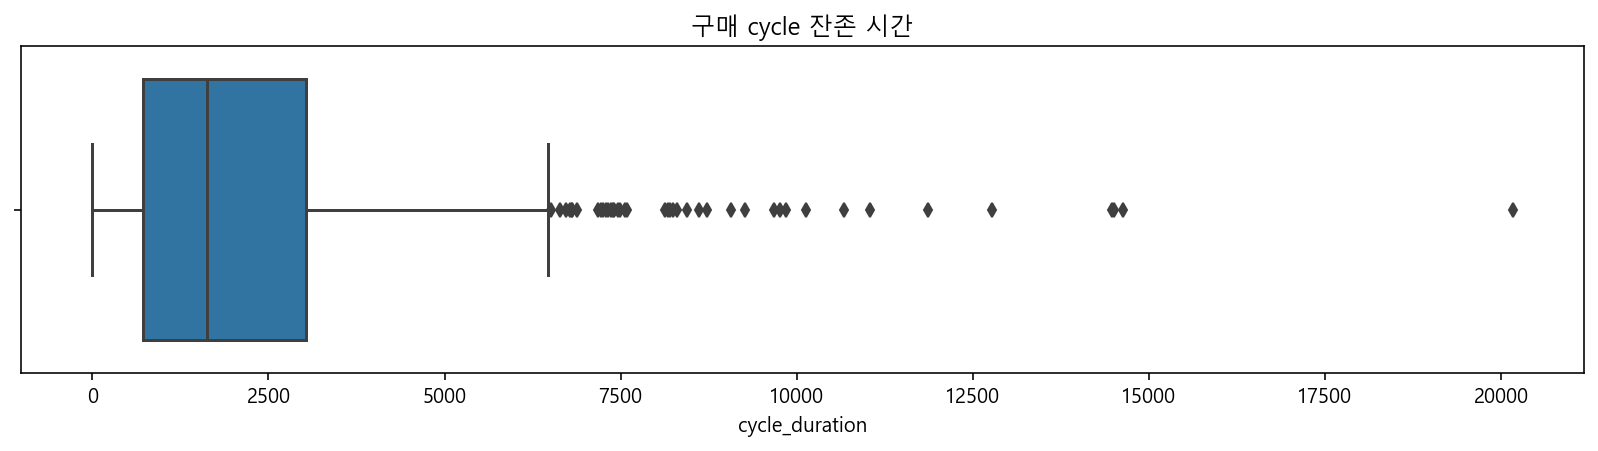

In [74]:
# 구매 cycle 잔존 시간 boxplot

# 구매 cycle 잔존 시간(평균)
duration_mean = data_purchase['cycle_duration'].mean()

# boxplot 및 평균 잔존 시간 출력
plt.figure(figsize = (14, 3))
ax = sns.boxplot(data = data_purchase, x = 'cycle_duration')
ax.set_title('구매 cycle 잔존 시간')  # 그래프 제목

print(f'구매 cycle 잔존 시간 평균 : {duration_mean}')

비구매 cycle 잔존 시간 평균 : 611.9902027010454


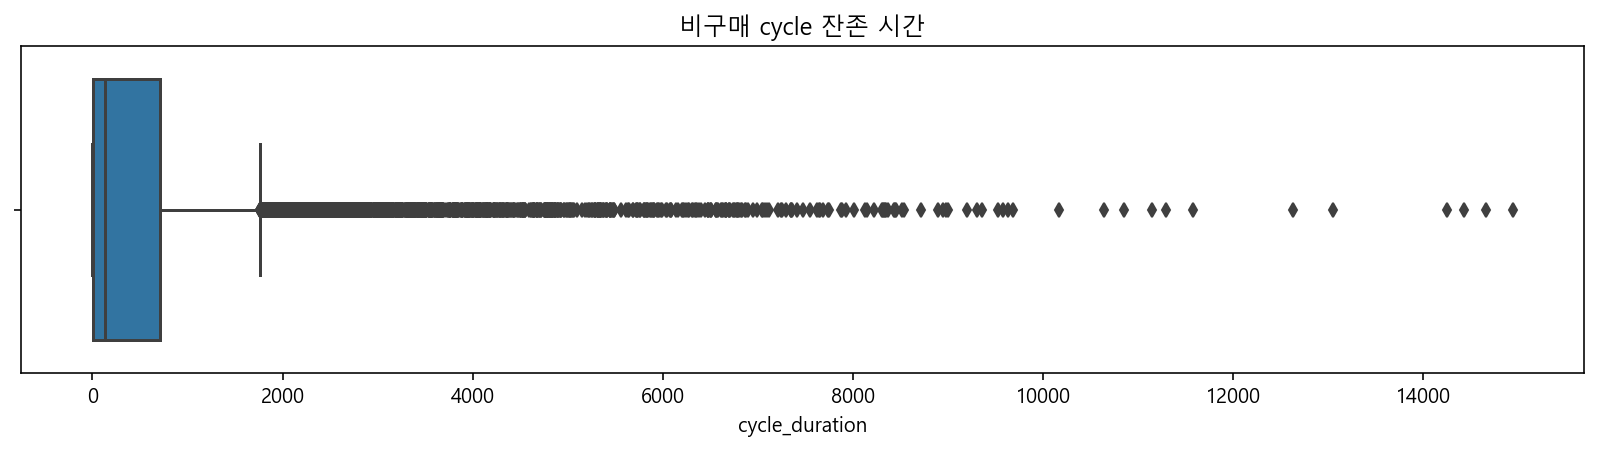

In [75]:
# 비구매 cycle 잔존 시간 boxplot

# 비구매 cycle 잔존 시간(평균)
duration_mean = data_npurchase['cycle_duration'].mean()

# boxplot 및 평균 잔존 시간 출력
plt.figure(figsize = (14, 3))
ax = sns.boxplot(data = data_npurchase, x = 'cycle_duration')
ax.set_title('비구매 cycle 잔존 시간')  # 그래프 제목

print(f'비구매 cycle 잔존 시간 평균 : {duration_mean}')